<a href="https://colab.research.google.com/github/bryan3342/Data-Science-CSCI-381/blob/main/Copy_of_R_Leung_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction




##Aim for Our Project
Our project aims to develop a robust predictive model for diabetes analysis such as diabetes prediction, blood glucose control, patient outcome, etc. Given the significant impact diabetes has in today's society and the increasing availability of **healthcare data**, effective analytical models are cruical for early detection, personalized treatment and improved patient outcomes.

Our team will explore a dataset related to different variables surrounding diabetes to identify key features and relationships that contribute to the outcome. We will leverage various machine learning techniques, including logistic regression, a Support Vector Machines (SVM), K-Nearest Neighbors (KNN) and different tree models to build predictive models.

Our approach will consist of the following developmental stages of our analysis:


*   **Comprehensive EDA :** We will begin by thoroughly examining the dataset, creating a comprehensive data summary and performing an EDA to uncover patterns, outliers and potential issues. This will involve utilizing frameworks such as the "7 stories one tells with data" to gain deeper insights.

*   **Data Processing and Feature Engineering :** To prepare the data for modeling, we will address missing values through various imputation techniques and engineer new features that may enhance model performance. We will carefully test out feature engineering and imputation strategies using statistical methods like chi-square and it's p-values.
*   **Model Development and Evaluation :** We will develop a range of predictive models, evaluating their performance using a suite of metrics including Precision, Accuracy, Recall, Specificity and F1-Score.


*   **Hyperparameter Tuning and Ensemble Modeling :** To optimize our models, we will systematically tune hyperparameters and explore the benefits of combining multiple models throguh ensemble methods.


*   **Comprehensive Analysis and Reporting :** Finally, we will summarize our end-to-end data science approach, discuss the iterative process of model refinement, and present the characteristics and performance of our final chosen model.

Through this **structured approach**, our goal is to deliver an insightful analysis and reliable predictive model that can contribute to better understanding and management of predicting trends in those with diabetes.



##What is diabetes?
Diabetes is a condition were your blood sugar is high and your pancreas doesn’t make enough insulin or isn’t responding to the effects of insulin properly (Cleveland Clinic). Glucose or sugar comes from the foods and drinks we consume. Foods like rice, potatoe, fruits are high in carbohydrates. These carbohydrates are broken down into glucose during digestion. When glucose or simple sugar enter our blood streams, it will trigger the pancreas to release insulin. Insulin is what opens up the cells for the cells to receive glucose. Without insulin, the cell will not open and the glucose will stay in the blood stream. This causes high glucose levels in the body, which will lead to other health issues.

*Diabetes*, from Cleveland Clinic. https://my.clevelandclinic.org/health/diseases/7104-diabetes

##Questions To Ask Before Analyzing Our Data Set

Prior to fully breaking down our dataset into a more concise and cleaned set of data, we can prepare questions to solve based on the features presented such as :


*   What might indicate that someone *has* diabetes?

*   As you age, does your risk of diabetes *increase*?

*   How does insulin levels *indicate* diabetes?

*   Does pregnancy play a *key role* in hereditary diabetes?

*   Do any physical traits in a carrier *indicate* that they have diabetes?

Something to keep in mind as well :

*  Hormonal imbalances: During pregnancy, the placenta releases hormones that cause insulin resistance. You may develop gestational diabetes if your pancreas can’t produce enough insulin to overcome the insulin resistance. Other hormone-related conditions like acromegaly and Cushing syndrome can also cause Type 2 diabetes (Cleveland Clinic).


## Conducting Our EDA :

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset from github repository
url = "https://github.com/falsefoobar/CS381/blob/main/diabetes.csv?raw=True"
df = pd.read_csv(url)


display(df.head())
display(df.info())
display(df.shape)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

(768, 9)

###**Dataset Pre-Processing**
After extracting our data we can see the dataset's structure, content and characteristics before we conduct a more in-depth analysis.


*   `df.head()` lists some of the prominent column names such as `Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age` and `Outcome`
  * We can see that the data types all appear to be numerical, meaning we do not need to order the values into a categorical format.  
* `df.info()` displays the column by index and confirms the data types of the values per row. We also confirm that there are only `non-null` entries.
*`df.shape()` returns a tuple representing the dimensions of the dataframe which means we have 9 confirmed features and 768 patient records to work with.

After extracting the features from this dataset, we can look into the deeper meaning behind the variables :

* `Pregnancies`: The number of times the patient has been pregnant.

* `Glucose`: the concentration of glucose in the blood

* `BloodPressure`: thepatient's blood pressure  

* `SkinThickness`:  The thickness of the skin

* `Insulin`: The level of insulin in the blood

* `BMI`: The body mass index

* `DiabetesPedigreeFunction`: a measure of diabetes family history

* `Age`: age of the patient

* `Outcome`: 0 for negative, 1 for positive for diabetes

### Visualizations of Data
We can properly represent the data visually and understand the distributions more comprehensively.

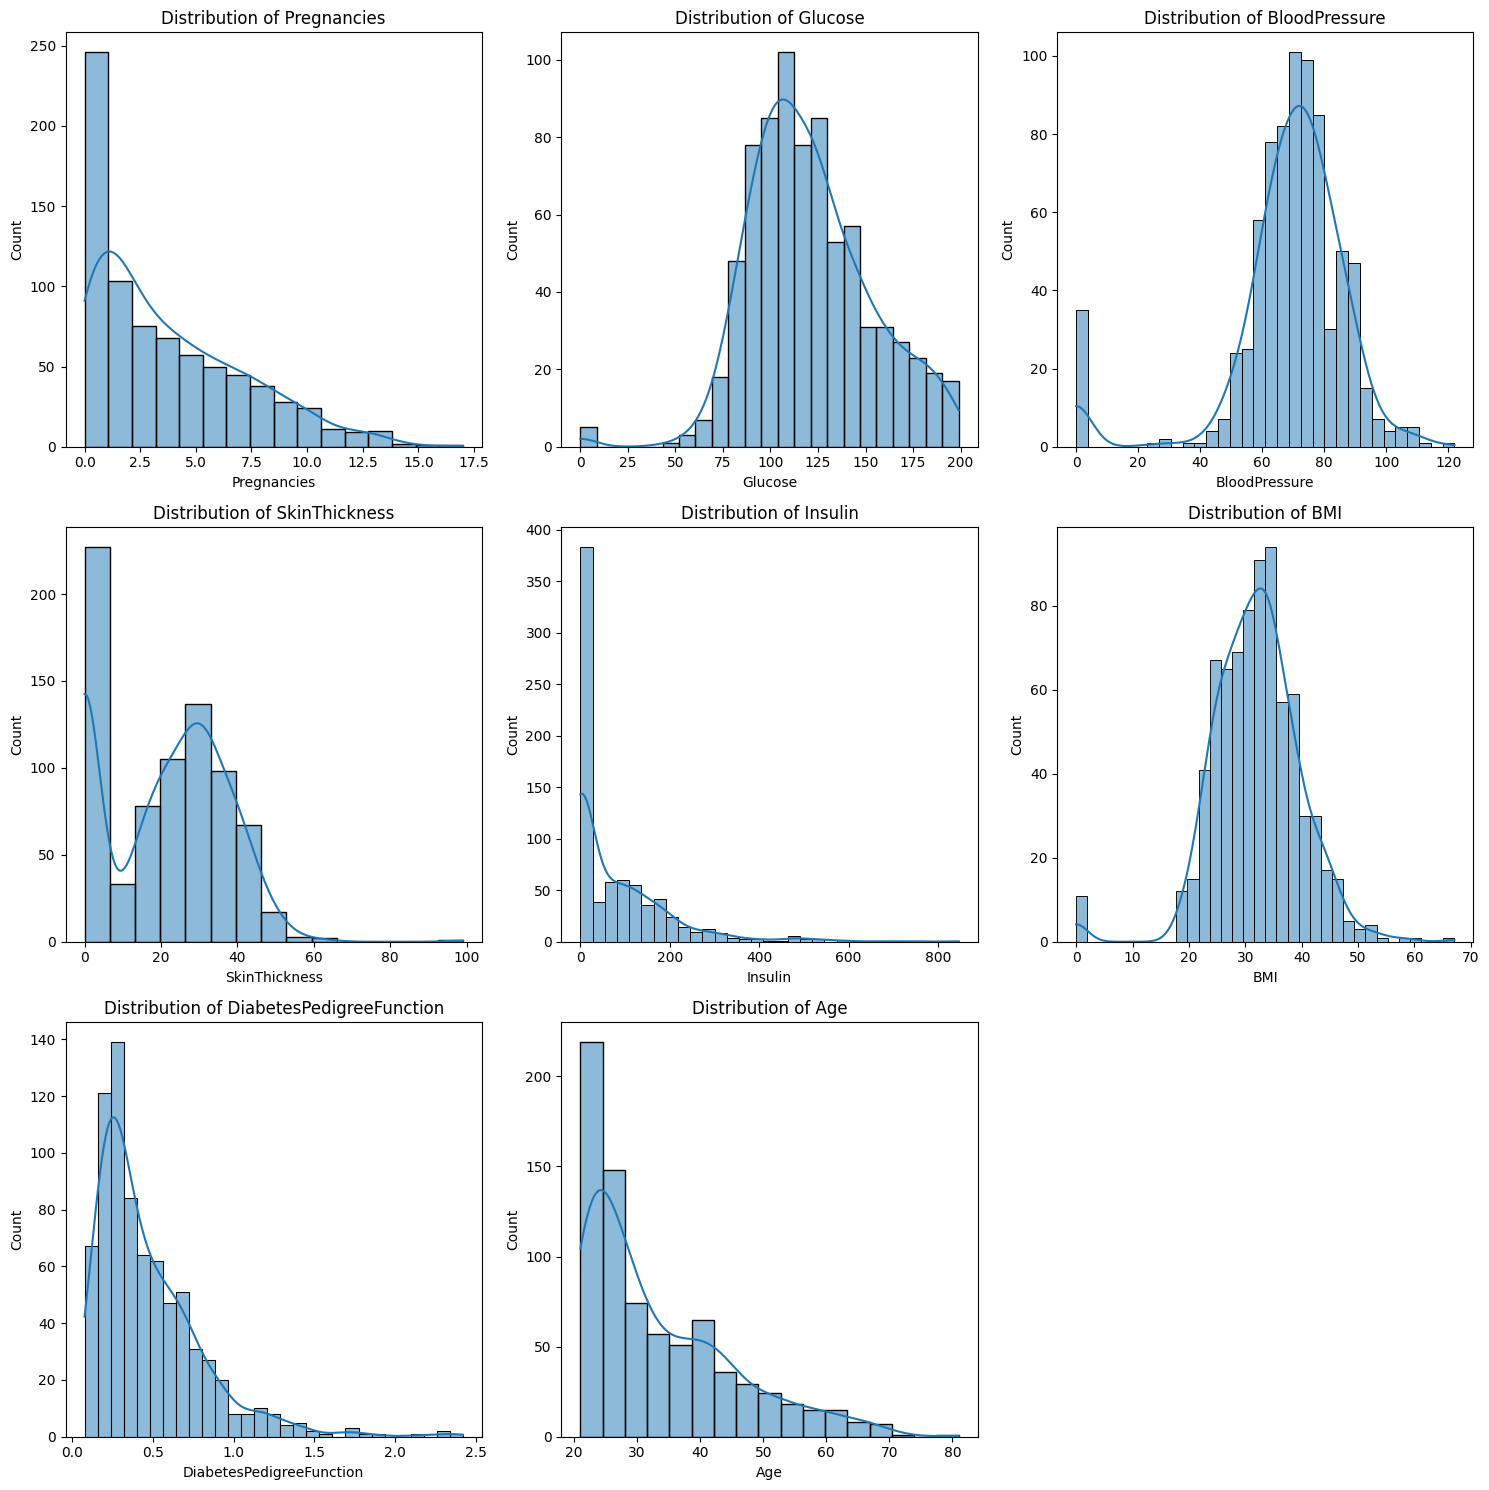

In [5]:
# Create distribution plots for each feature
features_to_plot = [col for col in df.columns if col != 'Outcome']

# Determine the number of rows and columns for the matrix
n_features = len(features_to_plot)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create distribution plots for each feature on a separate subplot
for i, col in enumerate(features_to_plot):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

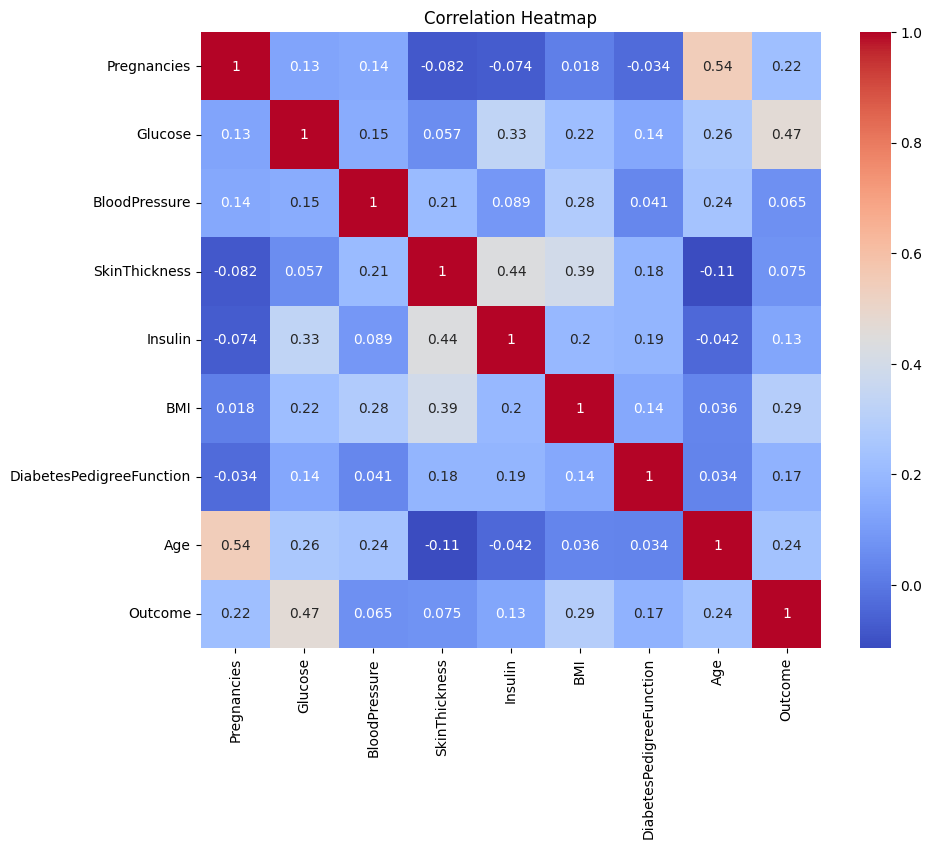

In [6]:
# Create a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#References
https://www.aad.org/public/diseases/a-z/diabetes-warning-signs

https://my.clevelandclinic.org/health/diseases/7104-diabetes